# 01 - Exploratory Data Analysis (EDA)
This notebook provides visual and statistical exploration of the Hillstrom email dataset.
It loads the dataset, performs summary statistics, and checks randomization.

In [3]:
import sys, os

notebook_dir = os.getcwd()

# Project root = notebook_dir/..
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to path:", project_root)

Project root added to path: d:\VSCode\External project\AB_Email_Testing


In [4]:
from src.data.data_loader import load_hillstrom
from src.features.eda import check_randomization
import pandas as pd
import matplotlib.pyplot as plt
df = load_hillstrom()
df.head()

d:\VSCode\External project\AB_Email_Testing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,visit,conversion,spend,segment
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,0,0,0.0,Womens E-Mail
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,0,0,0.0,No E-Mail
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,0,0,0.0,Womens E-Mail
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,0,0,0.0,Mens E-Mail
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,0,0,0.0,Womens E-Mail


## Summary statistics

In [5]:
df.describe(include='all')

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,visit,conversion,spend,segment
count,64000.000000,64000,64000.000000,64000.000000,64000.000000,64000,64000.000000,64000,64000.000000,64000.000000,64000.000000,64000
unique,NaN,7,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,3
top,NaN,1) $0 - $100,NaN,NaN,NaN,Surburban,NaN,Web,NaN,NaN,NaN,Womens E-Mail
freq,NaN,22970,NaN,NaN,NaN,28776,NaN,28217,NaN,NaN,NaN,21387
mean,5.763734,NaN,242.085656,0.551031,0.549719,NaN,0.502250,NaN,0.146781,0.009031,1.050908,NaN
std,3.507592,NaN,256.158608,0.497393,0.497526,NaN,0.499999,NaN,0.353890,0.094604,15.036448,NaN
min,1.000000,NaN,29.990000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,64.660000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN
50%,6.000000,NaN,158.110000,1.000000,1.000000,NaN,1.000000,NaN,0.000000,0.000000,0.000000,NaN
75%,9.000000,NaN,325.657500,1.000000,1.000000,NaN,1.000000,NaN,0.000000,0.000000,0.000000,NaN


## Randomization check

In [6]:
baseline_cols = [c for c in ['history','recency'] if c in df.columns]
check_randomization(df, baseline_cols)

,segment,variable,history,recency
0,Mens E-Mail,mean,242.835931,5.773642
1,Mens E-Mail,std,260.355685,3.513350
2,No E-Mail,mean,240.882653,5.749695
3,No E-Mail,std,252.739362,3.497517
4,Womens E-Mail,mean,242.536633,5.767850
5,Womens E-Mail,std,255.332880,3.511989


## Distribution plots

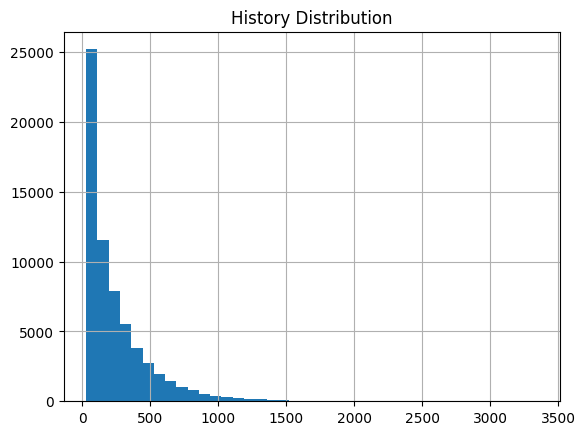

In [7]:
df['history'].hist(bins=40)
plt.title('History Distribution')
plt.show()